<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/022_search_volume_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.10 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Variable for Monthly Revenue Forecasting - Search Volume (2013-2022)**

### Contents

1. Get Company List
  *  1.1 Read Data
  *  1.2 Create Company List

2. Calculate Search Volume Score
  *  2.0 Setup
  *  2.1 Class & Methods
  *  2.2 Individual Company (e.g. 2330 台積電 & 1110 東泥)
  *  2.3 All the Companies
  *  2.4 Output

3. EDA of Search Volume Score
  *  3.1 Read Data
  *  3.2 Average Search Volume for Each Month
  *  3.3 Average Search Volume for Each Category of Companies (2023.06.18)

4. Calculate Regular Search Volume Score (2023.06.18)
  *  4.0 Setup
  *  4.1 Class & Methods
  *  4.2 Individual Company (e.g. 2330 台積電 & 1110 東泥)
  *  4.3 All the Companies
  *  4.4 Average Search Volume for Each Month
  *  4.5 Average Search Volume for Each Category of Companies
  *  4.6 Output

5. Scale Peak Search Volume Score by Regular Search Volume (2023.06.18)
  *  5.1 Original
  *  5.2 Modified
  *  5.3 Average Scaled Search Volume for Each Month
  *  5.4 Average Scaled Search Volume for Each Category of Companies
  *  5.5 Output

6. Calculate Search Volume Score (Exclude Zero) (2023.06.19)
  *  6.0 Setup
  *  6.1 Class & Methods
  *  6.2 Individual Company (e.g. 2330 台積電 & 1110 東泥)
  *  6.3 All the Companies
  *  6.4 Average Search Volume for Each Month
  *  6.5 Average Search Volume for Each Category of Companies
  *  6.6 Output



## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Project Path**

In [3]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Get Company List**


### **1.1 Read Data**

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [4]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [5]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 Create Company List**

In [6]:
# Company list
company_list = org_data.index
company_list

Index(['1101 台泥', '1102 亞泥', '1103 嘉泥', '1104 環泥', '1108 幸福', '1109 信大',
       '1110 東泥', '1201 味全', '1203 味王', '1210 大成',
       ...
       '9943 好樂迪', '9944 新麗', '9945 潤泰新', '9949 琉園', '9950 萬國通', '9951 皇田',
       '9955 佳龍', '9958 世紀鋼', '9960 邁達康', '9962 有益'],
      dtype='object', name='公司', length=1240)

## **2. Calculate Search Volume Score**

### **2.0 Setup**

In [ ]:
import time

In [ ]:
trends_save_path = os.path.join(project_path, '資料集/google trends')

### **2.1 Class & Methods**

In [ ]:
class MonthlySearchVolume():

    def __init__(self, company_list: list, year_start: int, year_end: int):
        self.company_list = company_list
        self.year_start = year_start
        self.year_end = year_end


    #-------------------- Individual Company --------------------

    def readCompanyTrends(self, index):
        file_name = self.company_list[index]
        trendsD = pd.read_csv(os.path.join(trends_save_path, f'monthly/{file_name}.csv'), index_col = 0).loc[['t-4', 't-3', 't-2', 't-1']]
        trendsD.columns = org_data.columns

        return trendsD


    def companySearchVolume(self, index, trendsD: pd.DataFrame = pd.DataFrame()):
        if trendsD.empty:
            trendsD = self.readCompanyTrends(index)

        if trendsD.isnull().all().all():    # company without trends data
            search_volume_1 = pd.DataFrame(0, columns = org_data.columns, index = [company_list[index]])
            search_volume_2 = pd.DataFrame(0, columns = org_data.columns, index = [company_list[index]])
        else:
            trendsD.loc['Mean'] = pd.Series(trendsD.mean())
            search_volume_1 = trendsD.loc[['Mean']]
            search_volume_1.index = [company_list[index]]
            search_volume_2 = trendsD.loc[['t-1']]
            search_volume_2.index = [company_list[index]]

        return search_volume_1, search_volume_2


   #-------------------- All the Companies --------------------

    def allCompanySearchVolume(self):
        start = time.time()

        all_search_volume_1 = pd.DataFrame(columns = org_data.columns)
        all_search_volume_2 = pd.DataFrame(columns = org_data.columns)

        for i in range(0, len(self.company_list), 1):
            search_volume_1, search_volume_2 = self.companySearchVolume(i)
            all_search_volume_1 = pd.concat([all_search_volume_1, search_volume_1])
            all_search_volume_2 = pd.concat([all_search_volume_2, search_volume_2])

        runtime = "%.3f"%(time.time() - start)
        print(f"Time spent: {runtime} sec.")

        return all_search_volume_1, all_search_volume_2


### **2.2 Individual Company (e.g. 2330 台積電 & 1110 東泥)**

In [ ]:
mt = MonthlySearchVolume(company_list, 2013, 2022)

In [ ]:
# 台積電
sv1, sv2 = mt.companySearchVolume(256)
display(sv1)
display(sv2)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2330 台積電,69.0,70.25,35.5,88.0,44.5,35.75,68.0,47.0,55.0,60.75,...,47.75,46.75,62.75,88.5,56.25,67.0,45.25,34.5,88.0,45.5


,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2330 台積電,86.0,94.0,35.0,89.0,25.0,44.0,96.0,67.0,53.0,66.0,...,78.0,87.0,55.0,84.0,83.0,100.0,41.0,48.0,94.0,75.0


In [ ]:
# 東泥
sv1, sv2 = mt.companySearchVolume(6)
display(sv1)
display(sv2)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1110 東泥,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1110 東泥,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **2.3 All the Companies (5 min.)**

In [ ]:
mt = MonthlySearchVolume(company_list, 2013, 2022)
all_search_volume_1, all_search_volume_2 = mt.allCompanySearchVolume()

Time spent: 294.195 sec.


In [ ]:
all_search_volume_1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,42.0,42.50,0.00,25.00,25.50,13.00,25.00,0.00,8.00,10.50,...,40.00,36.00,62.00,41.75,41.25,46.25,51.00,36.75,70.75,54.75
1102 亞泥,34.5,0.00,27.50,20.75,20.50,27.75,13.75,22.50,13.75,4.50,...,36.50,30.50,56.25,38.00,32.50,37.50,58.25,26.25,31.75,65.25
1103 嘉泥,0.0,14.50,21.00,31.75,0.00,15.00,8.00,25.00,23.00,24.75,...,10.50,9.75,15.75,15.50,14.00,38.75,7.25,21.25,0.00,7.25
1104 環泥,25.0,0.00,40.00,0.00,0.00,36.25,0.00,0.00,25.00,25.00,...,6.75,33.50,27.00,0.00,0.00,0.00,20.75,5.75,32.00,9.25
1108 幸福,64.5,59.00,76.50,75.00,65.75,66.25,77.50,90.25,74.75,74.25,...,76.75,84.50,78.25,70.00,76.00,86.00,81.25,84.75,82.50,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,14.00,12.50,8.25,4.50,0.00,13.00,19.00,15.75,8.25,...,9.50,34.75,33.75,0.00,11.50,20.25,0.00,0.00,0.00,0.00
9955 佳龍,25.5,7.25,25.00,13.50,29.75,23.75,53.00,0.00,0.00,38.00,...,44.00,30.25,18.25,19.50,30.25,36.50,47.00,54.00,45.00,38.25
9958 世紀鋼,25.0,0.00,24.25,6.25,36.25,0.00,0.00,0.00,9.25,0.00,...,44.75,32.00,30.25,12.25,5.25,19.50,56.50,56.00,53.25,33.00
9960 邁達康,25.0,0.00,52.50,0.00,34.75,0.00,25.50,0.00,0.00,25.00,...,44.75,19.25,28.00,14.25,46.00,4.50,12.25,11.75,46.00,47.00


In [ ]:
all_search_volume_2

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,57.0,66.0,0.0,0.0,0.0,27.0,100.0,0.0,0.0,0.0,...,20.0,53.0,66.0,19.0,58.0,30.0,62.0,57.0,79.0,73.0
1102 亞泥,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,52.0,78.0,74.0,70.0,50.0,81.0,49.0,0.0,100.0
1103 嘉泥,0.0,58.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,29.0
1104 環泥,0.0,0.0,96.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0
1108 幸福,83.0,56.0,73.0,80.0,65.0,66.0,92.0,94.0,74.0,75.0,...,82.0,92.0,71.0,67.0,69.0,77.0,84.0,77.0,92.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,0.0,0.0,0.0,18.0,0.0,52.0,0.0,0.0,0.0,...,0.0,39.0,72.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0
9955 佳龍,43.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,...,32.0,100.0,35.0,0.0,36.0,43.0,37.0,71.0,0.0,0.0
9958 世紀鋼,100.0,0.0,64.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,...,38.0,0.0,35.0,32.0,0.0,48.0,60.0,23.0,100.0,0.0
9960 邁達康,100.0,0.0,78.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,...,21.0,0.0,0.0,0.0,100.0,0.0,49.0,47.0,35.0,27.0


### **2.4 Output**

In [ ]:
output_path = os.path.join(project_path, '資料集/search volume')

In [ ]:
all_search_volume_1.to_csv(os.path.join(output_path, 'search_volume_mean.csv'))

In [ ]:
all_search_volume_2.to_csv(os.path.join(output_path, 'search_volume_t-1.csv'))

## **3. EDA of Search Volume Score**

### **3.1 Read Data**

In [7]:
# Mean
search_volume_mean = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_mean.csv'), index_col = 0)
search_volume_mean.columns = pd.to_datetime(search_volume_mean.columns, format="%Y-%m-%d").to_period('M')
search_volume_mean

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,42.0,42.50,0.00,25.00,25.50,13.00,25.00,0.00,8.00,10.50,...,40.00,36.00,62.00,41.75,41.25,46.25,51.00,36.75,70.75,54.75
1102 亞泥,34.5,0.00,27.50,20.75,20.50,27.75,13.75,22.50,13.75,4.50,...,36.50,30.50,56.25,38.00,32.50,37.50,58.25,26.25,31.75,65.25
1103 嘉泥,0.0,14.50,21.00,31.75,0.00,15.00,8.00,25.00,23.00,24.75,...,10.50,9.75,15.75,15.50,14.00,38.75,7.25,21.25,0.00,7.25
1104 環泥,25.0,0.00,40.00,0.00,0.00,36.25,0.00,0.00,25.00,25.00,...,6.75,33.50,27.00,0.00,0.00,0.00,20.75,5.75,32.00,9.25
1108 幸福,64.5,59.00,76.50,75.00,65.75,66.25,77.50,90.25,74.75,74.25,...,76.75,84.50,78.25,70.00,76.00,86.00,81.25,84.75,82.50,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,14.00,12.50,8.25,4.50,0.00,13.00,19.00,15.75,8.25,...,9.50,34.75,33.75,0.00,11.50,20.25,0.00,0.00,0.00,0.00
9955 佳龍,25.5,7.25,25.00,13.50,29.75,23.75,53.00,0.00,0.00,38.00,...,44.00,30.25,18.25,19.50,30.25,36.50,47.00,54.00,45.00,38.25
9958 世紀鋼,25.0,0.00,24.25,6.25,36.25,0.00,0.00,0.00,9.25,0.00,...,44.75,32.00,30.25,12.25,5.25,19.50,56.50,56.00,53.25,33.00
9960 邁達康,25.0,0.00,52.50,0.00,34.75,0.00,25.50,0.00,0.00,25.00,...,44.75,19.25,28.00,14.25,46.00,4.50,12.25,11.75,46.00,47.00


In [8]:
# t-1
search_volume_t1 = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_t-1.csv'), index_col = 0)
search_volume_t1.columns = pd.to_datetime(search_volume_t1.columns, format="%Y-%m-%d").to_period('M')
search_volume_t1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,57.0,66.0,0.0,0.0,0.0,27.0,100.0,0.0,0.0,0.0,...,20.0,53.0,66.0,19.0,58.0,30.0,62.0,57.0,79.0,73.0
1102 亞泥,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,52.0,78.0,74.0,70.0,50.0,81.0,49.0,0.0,100.0
1103 嘉泥,0.0,58.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,29.0
1104 環泥,0.0,0.0,96.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0
1108 幸福,83.0,56.0,73.0,80.0,65.0,66.0,92.0,94.0,74.0,75.0,...,82.0,92.0,71.0,67.0,69.0,77.0,84.0,77.0,92.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,0.0,0.0,0.0,18.0,0.0,52.0,0.0,0.0,0.0,...,0.0,39.0,72.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0
9955 佳龍,43.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,...,32.0,100.0,35.0,0.0,36.0,43.0,37.0,71.0,0.0,0.0
9958 世紀鋼,100.0,0.0,64.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,...,38.0,0.0,35.0,32.0,0.0,48.0,60.0,23.0,100.0,0.0
9960 邁達康,100.0,0.0,78.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,...,21.0,0.0,0.0,0.0,100.0,0.0,49.0,47.0,35.0,27.0


### **3.2 Average Search Volume for Each Month**

In [9]:
# Plot the mean of monthly revenues & search volume for each month
def plotMeanByMonth(data: pd.DataFrame, search_1: pd.DataFrame, search_2: pd.DataFrame, details: str, figure_x: int):
    org_mean = data.mean(axis=0)
    search_1_mean = search_1.mean(axis=0)
    search_2_mean = search_2.mean(axis=0)

    # Average
    plt.figure(figsize = (figure_x, 8))
    plt.title(f"Average Monthly Revenues and Search Volume ({details}) for Each Month", size = 14)
    plt.plot(org_mean.index.to_series().astype(str), org_mean.values, label = 'Average Monthly Revenue')
    plt.plot(search_1_mean.index.to_series().astype(str), search_1_mean.values, label = 'Search Volume - Mean')
    plt.plot(search_2_mean.index.to_series().astype(str), search_2_mean.values, label = 'Search Volume - t-1')
    plt.xticks(range(0, len(org_mean.index), 2), org_mean.index[::2], rotation=90)
    plt.legend(ncol = 3, loc = 'upper left')

    plt.show()

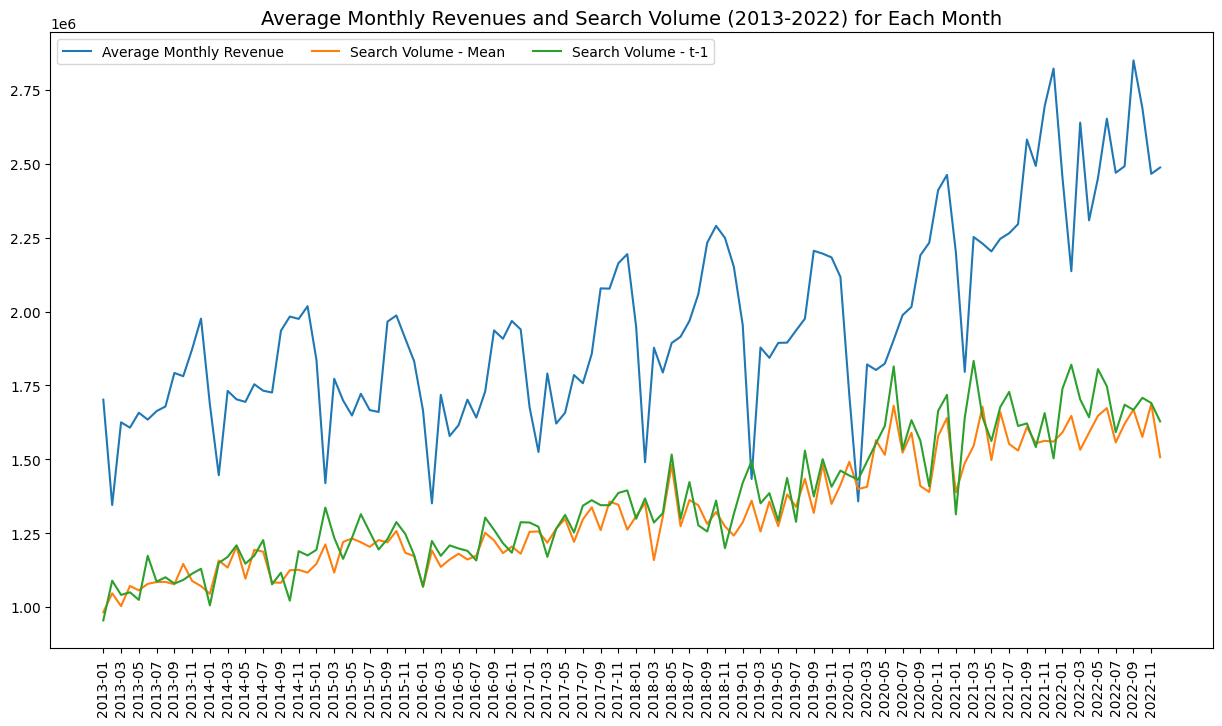

In [10]:
plotMeanByMonth(org_data, search_volume_mean*60000, search_volume_t1*60000, '2013-2022', 15)

In [11]:
org_data.mean(axis=0).mean()

1958683.7288306453

In [12]:
search_volume_mean_scale = search_volume_mean*80000
search_volume_mean_scale.mean(axis=0).mean()

1758755.241935484

In [13]:
search_volume_mean_scale = search_volume_mean*90000
search_volume_mean_scale.mean(axis=0).mean()

1978599.6471774194

### **3.3 Average Search Volume for Each Category of Companies**
2023.06.18

#### **3.3.1 Categorize Search Volume by Average Monthly Revenues**


In [14]:
org_data_rev_cate = pd.read_excel(os.path.join(project_path, 'code/preprocessing/org_data13_revenue_category.xlsx'), index_col = 0)

In [15]:
category_range = [100000, 1000000, 5000000, 10000000, 100000000]
category_labels = [f'<= {category_range[0]}', f'<= {category_range[1]}', f'<= {category_range[2]}', f'<= {category_range[3]}', f'<= {category_range[4]}', f'> {category_range[4]}']

In [16]:
def categorizeSearchVolume(searchD: pd.DataFrame):
    categorized_sv = {}
    for cate, label in enumerate(category_labels):
        index_list = org_data_rev_cate[org_data_rev_cate['Category'] == cate].index.tolist()
        categorized_sv[label] = searchD.loc[index_list]
    return categorized_sv

In [17]:
categorized_sv_mean = categorizeSearchVolume(search_volume_mean)
categorized_sv_t1 = categorizeSearchVolume(search_volume_t1)

#### **3.3.2 Plot**


In [18]:
# Plot the mean of search volumes for each category of company
def plotMeanByCategory(searchD: dict, details: str, figure_x: int):
    plt.figure(figsize = (figure_x, 8))
    plt.title(f"Average Search Volume ({details}) for Each Revenue Category", size = 14)

    for key, value in searchD.items():
        search_mean = value.mean(axis=0)
        plt.plot(search_mean.index.to_series().astype(str), search_mean.values, label = key)

    plt.xticks(range(0, org_data.shape[1], 2), org_data.columns[::2], rotation = 90)
    plt.legend(ncol = 6, loc = 'upper left')
    plt.show()

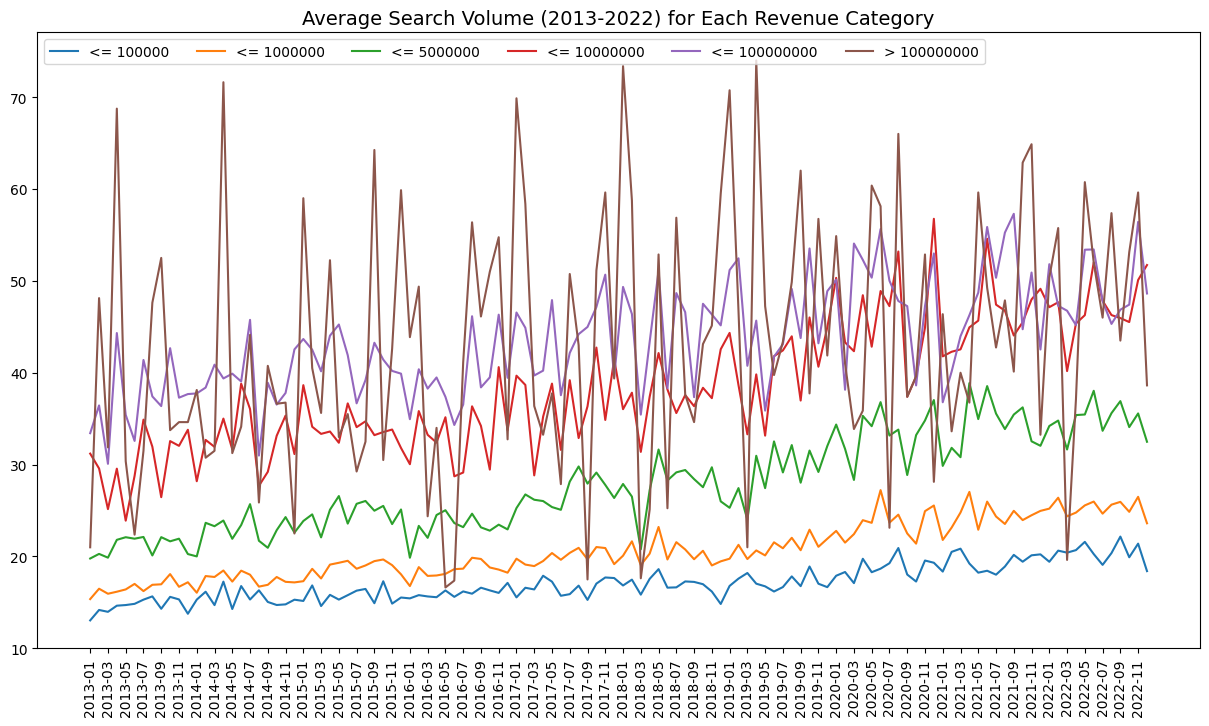

In [19]:
plotMeanByCategory(categorized_sv_mean, '2013-2022', 15)

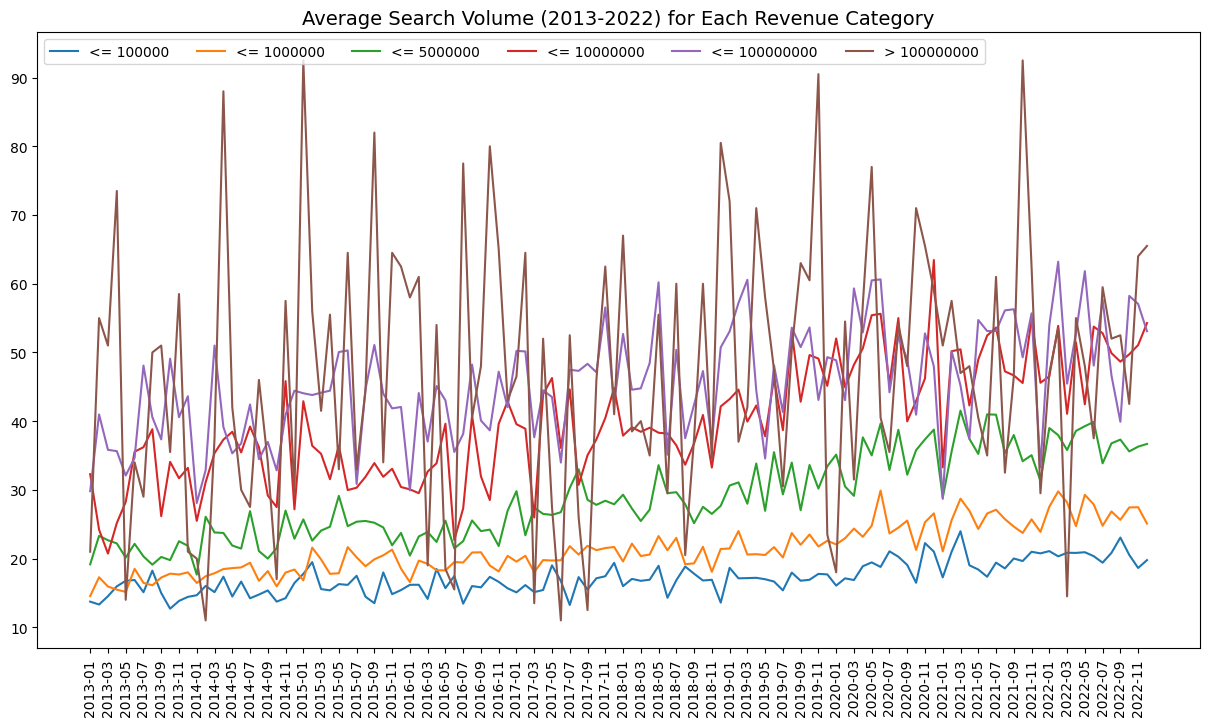

In [20]:
plotMeanByCategory(categorized_sv_t1, '2013-2022', 15)

營收愈高的公司，搜尋分數也會愈高

## **4. Calculate Regular Search Volume Score**
2023.06.18

非高峰時段的平日搜尋量

### **4.0 Setup**

In [21]:
import time

In [22]:
trends_save_path = os.path.join(project_path, '資料集/google trends')

### **4.1 Class & Methods**

In [23]:
class RegularMonthlySearchVolume():

    def __init__(self, company_list: list, year_start: int, year_end: int):
        self.company_list = company_list
        self.year_start = year_start
        self.year_end = year_end


    #-------------------- Individual Company --------------------

    def readCompanyTrends(self, index):
        file_name = self.company_list[index]
        trendsD = pd.read_csv(os.path.join(trends_save_path, f'monthly/{file_name}.csv'), index_col = 0).loc['t-15':'t-1']
        trendsD.columns = org_data.columns

        return trendsD


    def companySearchVolume(self, index, trendsD: pd.DataFrame = pd.DataFrame()):
        if trendsD.empty:
            trendsD = self.readCompanyTrends(index)

        if trendsD.isnull().all().all():    # company without trends data
            search_volume_1 = pd.DataFrame(0, columns = org_data.columns, index = [company_list[index]])
            search_volume_2 = pd.DataFrame(0, columns = org_data.columns, index = [company_list[index]])
        else:
            search_volume_1 = pd.DataFrame([trendsD.loc['t-15':'t-5'].mean()], columns = org_data.columns, index = [company_list[index]])
            search_volume_2 = pd.DataFrame([trendsD.loc['t-15':'t-2'].mean()], columns = org_data.columns, index = [company_list[index]])
            # search_volume_1 = pd.DataFrame([trendsD.loc['t-5']], columns = org_data.columns, index = [company_list[index]])
            # search_volume_2 = pd.DataFrame([trendsD.loc['t-2']], columns = org_data.columns, index = [company_list[index]])

        return search_volume_1, search_volume_2


   #-------------------- All the Companies --------------------

    def allCompanySearchVolume(self):
        start = time.time()

        all_search_volume_1 = pd.DataFrame(columns = org_data.columns)
        all_search_volume_2 = pd.DataFrame(columns = org_data.columns)

        for i in range(0, len(self.company_list), 1):
            search_volume_1, search_volume_2 = self.companySearchVolume(i)
            all_search_volume_1 = pd.concat([all_search_volume_1, search_volume_1])
            all_search_volume_2 = pd.concat([all_search_volume_2, search_volume_2])

        runtime = "%.3f"%(time.time() - start)
        print(f"Time spent: {runtime} sec.")

        return all_search_volume_1, all_search_volume_2


### **4.2 Individual Company (e.g. 2330 台積電 & 1110 東泥)**

In [24]:
rmt = RegularMonthlySearchVolume(company_list, 2013, 2022)

In [25]:
# 台積電
sv1, sv2 = rmt.companySearchVolume(256)
display(sv1)
display(sv2)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2330 台積電,52.727273,51.545455,27.727273,52.909091,62.545455,44.272727,53.454545,56.272727,57.909091,53.545455,...,52.181818,60.454545,41.0,53.0,76.454545,66.909091,32.181818,41.545455,58.727273,54.181818


,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2330 台積電,55.0,53.857143,29.428571,60.357143,60.071429,41.857143,54.571429,52.857143,57.428571,54.714286,...,49.071429,54.642857,46.214286,60.928571,70.214286,64.571429,35.285714,39.071429,64.571429,50.214286


In [26]:
# 東泥
sv1, sv2 = rmt.companySearchVolume(6)
display(sv1)
display(sv2)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1110 東泥,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1110 東泥,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **4.3 All the Companies (5 min.)**

In [27]:
rmt = RegularMonthlySearchVolume(company_list, 2013, 2022)
all_regular_search_volume_1, all_regular_search_volume_2 = rmt.allCompanySearchVolume()

Time spent: 302.723 sec.


In [28]:
all_regular_search_volume_1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,22.909091,34.363636,28.454545,24.363636,36.090909,33.272727,9.363636,18.909091,16.363636,24.454545,...,44.454545,59.363636,51.727273,39.636364,60.272727,76.454545,53.272727,36.090909,60.636364,61.545455
1102 亞泥,0.000000,6.818182,4.181818,19.818182,14.818182,27.363636,13.363636,16.000000,10.727273,18.818182,...,53.000000,33.636364,34.090909,43.454545,61.272727,60.181818,48.181818,33.272727,38.909091,32.727273
1103 嘉泥,9.727273,8.636364,9.727273,15.454545,18.181818,9.909091,16.636364,16.090909,17.818182,14.181818,...,25.454545,15.272727,27.636364,15.000000,19.272727,20.818182,13.909091,0.000000,10.181818,15.454545
1104 環泥,7.363636,18.000000,7.272727,0.000000,20.090909,0.000000,0.000000,14.363636,11.454545,20.636364,...,25.272727,10.090909,5.545455,18.454545,31.090909,3.000000,13.000000,11.454545,42.272727,12.909091
1108 幸福,59.454545,79.090909,63.909091,83.363636,79.727273,63.909091,88.090909,85.363636,76.636364,86.636364,...,81.909091,79.363636,80.363636,56.272727,80.909091,85.545455,74.636364,77.636364,88.181818,70.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,7.727273,19.454545,17.636364,10.909091,3.545455,27.727273,14.090909,20.272727,9.090909,0.000000,...,25.636364,5.545455,23.818182,21.363636,4.090909,2.727273,17.545455,13.818182,8.272727,2.181818
9955 佳龍,19.727273,19.727273,0.000000,0.000000,14.636364,22.909091,8.727273,13.818182,22.272727,20.272727,...,44.909091,35.000000,40.272727,41.909091,23.636364,37.090909,39.000000,31.090909,35.454545,33.181818
9958 世紀鋼,15.000000,0.000000,14.636364,9.090909,21.000000,23.909091,3.636364,14.000000,10.272727,18.545455,...,29.181818,43.636364,31.272727,33.000000,11.454545,32.636364,39.363636,26.909091,12.909091,18.818182
9960 邁達康,13.363636,9.181818,7.454545,33.454545,8.545455,9.090909,16.363636,9.090909,7.909091,14.272727,...,17.090909,22.454545,20.454545,19.272727,31.272727,32.272727,16.181818,33.545455,30.909091,13.363636


In [29]:
all_regular_search_volume_2

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,25.928571,34.428571,22.357143,26.285714,35.642857,27.928571,7.357143,14.857143,15.142857,22.214286,...,44.928571,53.142857,53.642857,41.714286,55.000000,71.142857,52.000000,34.785714,62.214286,58.785714
1102 亞泥,3.785714,5.357143,11.142857,21.500000,17.500000,29.428571,14.428571,19.000000,12.357143,16.071429,...,48.214286,31.428571,37.285714,39.714286,52.428571,54.428571,48.714286,30.142857,39.642857,37.214286
1103 嘉泥,7.642857,6.785714,13.642857,14.500000,14.285714,12.071429,15.357143,19.785714,20.571429,18.214286,...,23.000000,14.785714,26.214286,16.214286,17.142857,27.428571,13.000000,6.071429,8.000000,12.142857
1104 環泥,12.928571,14.142857,10.285714,0.000000,15.785714,7.142857,0.000000,11.285714,16.142857,23.357143,...,21.785714,17.500000,8.214286,14.500000,24.428571,2.357143,16.142857,10.642857,38.214286,12.785714
1108 幸福,59.214286,75.000000,66.857143,81.214286,76.785714,64.428571,84.785714,86.142857,76.285714,83.928571,...,80.428571,79.928571,80.428571,59.428571,80.357143,86.285714,75.857143,79.714286,86.285714,70.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,6.071429,19.285714,17.428571,10.928571,2.785714,21.785714,11.071429,21.357143,11.642857,2.357143,...,22.857143,11.500000,23.214286,16.785714,3.214286,7.928571,13.785714,10.857143,6.500000,1.714286
9955 佳龍,19.714286,17.571429,7.142857,3.857143,20.000000,24.785714,19.000000,10.857143,17.500000,26.785714,...,45.571429,29.000000,34.357143,38.500000,24.642857,36.500000,41.428571,34.785714,40.714286,37.000000
9958 世紀鋼,11.785714,0.000000,13.857143,8.928571,20.785714,18.785714,2.857143,11.000000,10.714286,14.571429,...,33.000000,43.428571,30.714286,27.142857,10.500000,27.785714,42.785714,35.500000,18.214286,24.214286
9960 邁達康,10.500000,7.214286,15.285714,26.285714,16.642857,7.142857,17.785714,7.142857,6.214286,18.357143,...,24.714286,23.142857,24.071429,19.214286,30.571429,26.642857,12.714286,26.357143,34.928571,22.000000


### **4.4 Average Search Volume for Each Month**

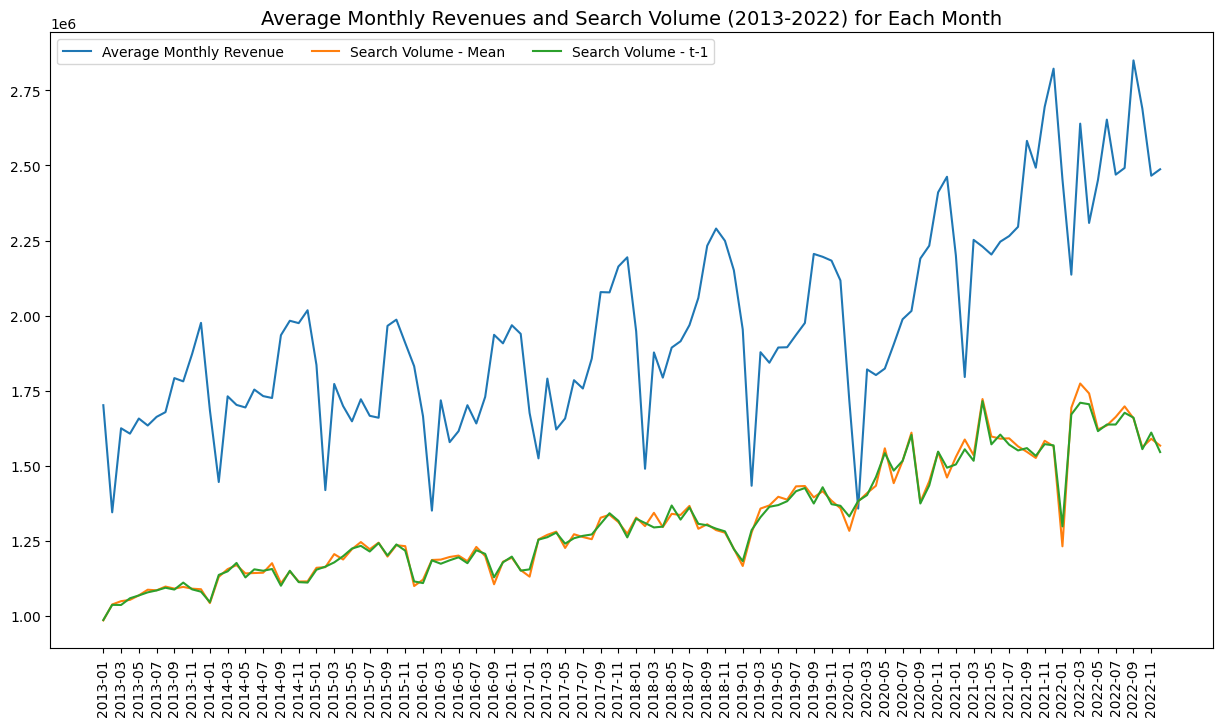

In [30]:
plotMeanByMonth(org_data, all_regular_search_volume_1*60000, all_regular_search_volume_2*60000, '2013-2022', 15)

### **4.5 Average Search Volume for Each Category of Companies**


#### **4.5.1 Categorize Search Volume by Average Monthly Revenues**


In [31]:
categorized_sv_reg_mean = categorizeSearchVolume(all_regular_search_volume_1)
categorized_sv_reg_t1 = categorizeSearchVolume(all_regular_search_volume_2)

#### **4.5.2 Plot**


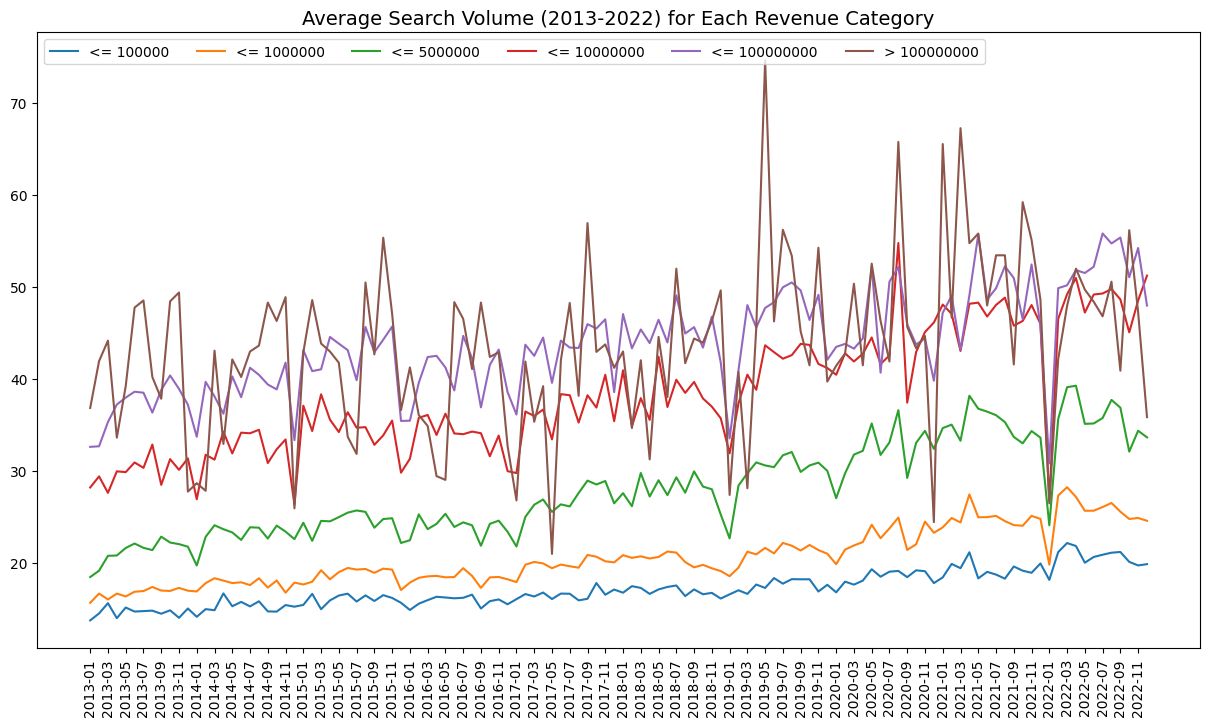

In [32]:
plotMeanByCategory(categorized_sv_reg_mean, '2013-2022', 15)

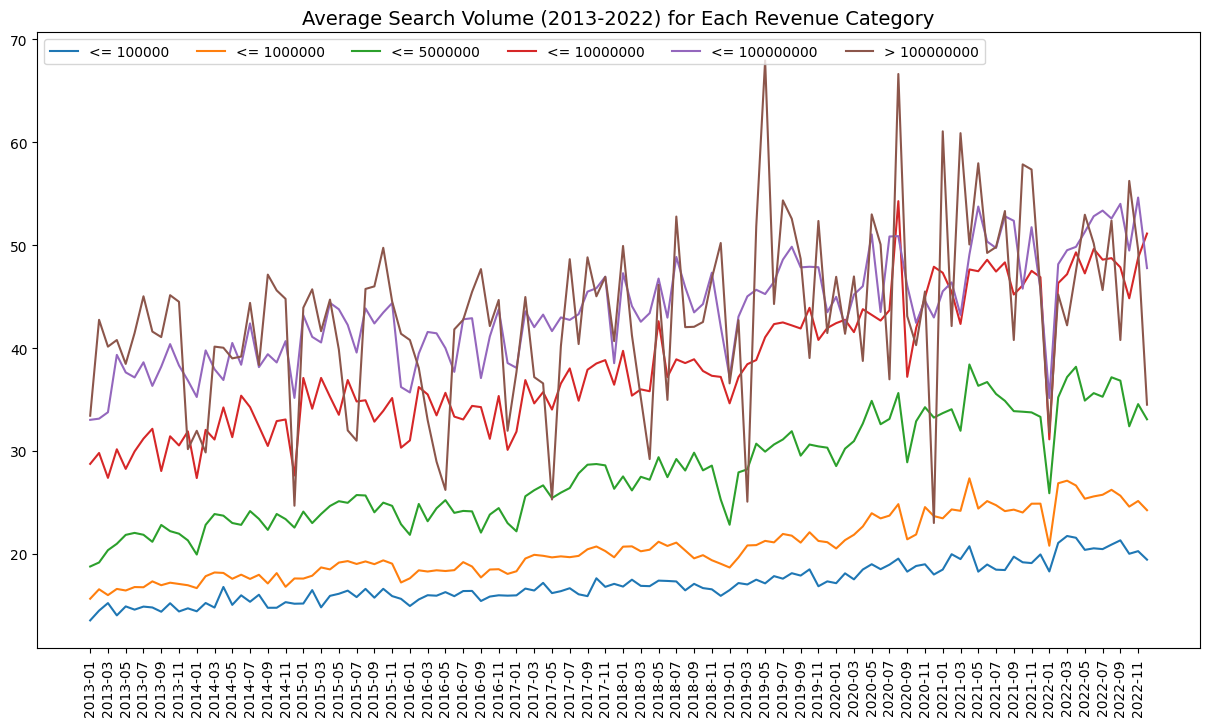

In [33]:
plotMeanByCategory(categorized_sv_reg_t1, '2013-2022', 15)

營收愈高的公司，搜尋分數也會愈高

### **4.6 Output**

In [34]:
output_path = os.path.join(project_path, '資料集/search volume')

In [35]:
all_regular_search_volume_1.to_csv(os.path.join(output_path, 'search_volume_mean_regular.csv'))

In [36]:
all_regular_search_volume_2.to_csv(os.path.join(output_path, 'search_volume_t-1_regular.csv'))

## **5. Scale Peak Search Volume Score by Regular Search Volume**
2023.06.18


### **5.1 Original**


In [37]:
# Mean
scaled_search_volume_mean = np.where(search_volume_mean == 0, 0,
                                     np.where(all_regular_search_volume_1 == 0, np.nan,
                                              search_volume_mean / all_regular_search_volume_1))
scaled_search_volume_mean = pd.DataFrame(scaled_search_volume_mean, columns = search_volume_mean.columns, index = search_volume_mean.index)
scaled_search_volume_mean

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,1.833333,1.236772,0.000000,1.026119,0.706549,0.390710,2.669903,0.000000,0.488889,0.429368,...,0.899796,0.606432,1.198594,1.053326,0.684389,0.604935,0.957338,1.018262,1.166792,0.889586
1102 亞泥,NaN,0.000000,6.576087,1.047018,1.383436,1.014120,1.028912,1.406250,1.281780,0.239130,...,0.688679,0.906757,1.650000,0.874477,0.530415,0.623112,1.208962,0.788934,0.816005,1.993750
1103 嘉泥,0.000000,1.678947,2.158879,2.054412,0.000000,1.513761,0.480874,1.553672,1.290816,1.745192,...,0.412500,0.638393,0.569901,1.033333,0.726415,1.861354,0.521242,NaN,0.000000,0.469118
1104 環泥,3.395062,0.000000,5.500000,0.000000,0.000000,NaN,0.000000,0.000000,2.182540,1.211454,...,0.267086,3.319820,4.868852,0.000000,0.000000,0.000000,1.596154,0.501984,0.756989,0.716549
1108 幸福,1.084862,0.745977,1.197013,0.899673,0.824686,1.036629,0.879773,1.057242,0.975386,0.857030,...,0.937014,1.064719,0.973699,1.243942,0.939326,1.005313,1.088611,1.091628,0.935567,0.978093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.000000,0.719626,0.708763,0.756250,1.269231,0.000000,0.922581,0.937220,1.732500,NaN,...,0.370567,6.266393,1.416985,0.000000,2.811111,7.425000,0.000000,0.000000,0.000000,0.000000
9955 佳龍,1.292627,0.367512,NaN,NaN,2.032609,1.036706,6.072917,0.000000,0.000000,1.874439,...,0.979757,0.864286,0.453160,0.465293,1.279808,0.984069,1.205128,1.736842,1.269231,1.152740
9958 世紀鋼,1.666667,0.000000,1.656832,0.687500,1.726190,0.000000,0.000000,0.000000,0.900442,0.000000,...,1.533489,0.733333,0.967297,0.371212,0.458333,0.597493,1.435335,2.081081,4.125000,1.753623
9960 邁達康,1.870748,0.000000,7.042683,0.000000,4.066489,0.000000,1.558333,0.000000,0.000000,1.751592,...,2.618351,0.857287,1.368889,0.739387,1.470930,0.139437,0.757022,0.350271,1.488235,3.517007


In [38]:
scaled_search_volume_mean.isnull().sum().sum()

2800

In [39]:
# t-1
scaled_search_volume_t1 = np.where(search_volume_t1 == 0, 0,
                                   np.where(all_regular_search_volume_2 == 0, np.nan,
                                            search_volume_t1 / all_regular_search_volume_2))
scaled_search_volume_t1 = pd.DataFrame(scaled_search_volume_t1, columns = search_volume_t1.columns, index = search_volume_t1.index)
scaled_search_volume_t1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,2.198347,1.917012,0.000000,0.000000,0.000000,0.966752,13.592233,0.000000,0.000000,0.000000,...,0.445151,0.997312,1.230360,0.455479,1.054545,0.421687,1.192308,1.638604,1.269805,1.241798
1102 亞泥,22.452830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.120000,1.654545,2.091954,1.863309,1.335150,0.918635,1.662757,1.625592,0.000000,2.687140
1103 嘉泥,0.000000,8.547368,0.000000,6.482759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.633333,0.000000,0.000000,0.000000,0.000000,2.388235
1104 環泥,0.000000,0.000000,9.333333,0.000000,0.000000,6.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.573913,0.000000,0.000000,0.000000,0.000000,0.000000,1.517757,0.000000
1108 幸福,1.401689,0.746667,1.091880,0.985048,0.846512,1.024390,1.085088,1.091211,0.970037,0.893617,...,1.019538,1.151028,0.882771,1.127404,0.858667,0.892384,1.107345,0.965950,1.066225,0.876768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.000000,0.000000,0.000000,0.000000,6.461538,0.000000,4.696774,0.000000,0.000000,0.000000,...,0.000000,3.391304,3.101538,0.000000,14.311111,0.000000,0.000000,0.000000,0.000000,0.000000
9955 佳龍,2.181159,0.000000,0.000000,0.000000,0.000000,0.000000,2.210526,0.000000,0.000000,0.000000,...,0.702194,3.448276,1.018711,0.000000,1.460870,1.178082,0.893103,2.041068,0.000000,0.000000
9958 世紀鋼,8.484848,0.000000,4.618557,0.000000,4.089347,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.151515,0.000000,1.139535,1.178947,0.000000,1.727506,1.402337,0.647887,5.490196,0.000000
9960 邁達康,9.523810,0.000000,5.102804,0.000000,0.000000,0.000000,1.855422,0.000000,0.000000,0.000000,...,0.849711,0.000000,0.000000,0.000000,3.271028,0.000000,3.853933,1.783198,1.002045,1.227273


In [40]:
scaled_search_volume_t1.isnull().sum().sum()

482

### **5.2 Modified**


Since there is a situation where the peak search volume is larger than 1, but the regular search volume is 0, we simply add 1 to all the search volume scores.

$$Scaled Search Volume = \frac{Peak Search Volume + 1}{Regular Search Volume + 1}$$

In [41]:
# Mean
scaled_search_volume_mean = (search_volume_mean + 1) / (all_regular_search_volume_1 + 1)
scaled_search_volume_mean

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,1.798479,1.230077,0.033951,1.025090,0.714461,0.408488,2.508772,0.050228,0.518325,0.451786,...,0.902000,0.612952,1.194828,1.052013,0.689540,0.610035,0.958124,1.017770,1.164086,0.891352
1102 亞泥,35.500000,0.127907,5.500000,1.044760,1.359195,1.013622,1.026899,1.382353,1.257752,0.277523,...,0.694444,0.909449,1.631477,0.877301,0.537956,0.629272,1.204713,0.795093,0.820615,1.964286
1103 嘉泥,0.093220,1.608491,2.050847,1.990331,0.052133,1.466667,0.510309,1.521277,1.275362,1.696108,...,0.434708,0.660615,0.584921,1.031250,0.739910,1.821875,0.553354,22.250000,0.089431,0.501381
1104 環泥,3.108696,0.052632,4.956044,1.000000,0.047414,37.250000,1.000000,0.065089,2.087591,1.201681,...,0.294983,3.110656,4.277778,0.051402,0.031161,0.250000,1.553571,0.541971,0.762605,0.736928
1108 幸福,1.083459,0.749149,1.193978,0.900862,0.826858,1.036064,0.881122,1.056579,0.975703,0.858662,...,0.937774,1.063914,0.974022,1.239683,0.940067,1.005252,1.087440,1.090462,0.936290,0.978399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.114583,0.733333,0.724390,0.776718,1.210000,0.034810,0.927711,0.940171,1.659910,9.250000,...,0.394198,5.461806,1.400183,0.044715,2.455357,5.701220,0.053922,0.067485,0.107843,0.314286
9955 佳龍,1.278509,0.398026,26.000000,14.500000,1.966570,1.035171,5.551402,0.067485,0.042969,1.833333,...,0.980198,0.868056,0.466410,0.477754,1.268450,0.984487,1.200000,1.713881,1.261845,1.148271
9958 世紀鋼,1.625000,1.000000,1.614826,0.718468,1.693182,0.040146,0.215686,0.066667,0.909274,0.051163,...,1.515813,0.739308,0.968310,0.389706,0.501825,0.609459,1.424550,2.042345,3.900327,1.715596
9960 邁達康,1.810127,0.098214,6.327957,0.029024,3.745238,0.099099,1.526178,0.099099,0.112245,1.702381,...,2.528894,0.863372,1.351695,0.752242,1.456338,0.165301,0.771164,0.369079,1.472934,3.341772


In [42]:
scaled_search_volume_mean.isnull().sum().sum()

0

In [43]:
# t-1
scaled_search_volume_t1 = (search_volume_t1 + 1) / (all_regular_search_volume_2 + 1)
scaled_search_volume_t1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,2.153846,1.891129,0.042813,0.036649,0.027290,0.967901,12.085470,0.063063,0.061947,0.043077,...,0.457232,0.997361,1.226144,0.468227,1.053571,0.429703,1.188679,1.620758,1.265537,1.237754
1102 亞泥,17.970149,0.157303,0.082353,0.044444,0.054054,0.032864,0.064815,0.050000,0.074866,0.058577,...,1.117562,1.634361,2.063433,1.842105,1.328877,0.920103,1.649425,1.605505,0.024605,2.642991
1103 嘉泥,0.115702,7.577982,0.068293,6.129032,0.065421,0.076503,0.061135,0.048110,0.046358,0.052045,...,0.041667,0.063348,0.036745,0.058091,1.598425,0.035176,0.071429,0.141414,0.111111,2.282609
1104 環泥,0.071795,0.066038,8.594937,1.000000,0.059574,5.649123,1.000000,0.081395,0.058333,0.041056,...,0.043887,0.054054,5.968992,0.064516,0.039326,0.297872,0.058333,0.085890,1.504554,0.072539
1108 幸福,1.395018,0.750000,1.090526,0.985230,0.848485,1.024017,1.084097,1.090164,0.970425,0.894870,...,1.019298,1.149162,0.884211,1.125296,0.860404,0.893617,1.105948,0.966372,1.065466,0.878486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.141414,0.049296,0.054264,0.083832,5.018868,0.043887,4.390533,0.044728,0.079096,0.297872,...,0.041916,3.200000,3.014749,0.056225,11.152542,0.112000,0.067633,0.084337,0.133333,0.368421
9955 佳龍,2.124138,0.053846,0.122807,0.205882,0.047619,0.038781,2.150000,0.084337,0.054054,0.035990,...,0.708589,3.366667,1.018182,0.025316,1.442897,1.173333,0.895623,2.011976,0.023973,0.026316
9958 世紀鋼,7.899441,1.000000,4.375000,0.100719,3.947541,0.050542,0.259259,0.083333,0.085366,0.064220,...,1.147059,0.022508,1.135135,1.172589,0.086957,1.702233,1.393148,0.657534,5.256506,0.039660
9960 邁達康,8.782609,0.121739,4.850877,0.036649,0.056680,0.122807,1.809886,0.122807,0.138614,0.051661,...,0.855556,0.041420,0.039886,0.049470,3.199095,0.036176,3.645833,1.754569,1.001988,1.217391


In [44]:
scaled_search_volume_t1.isnull().sum().sum()

0

### **5.3 Average Scaled Search Volume for Each Month**

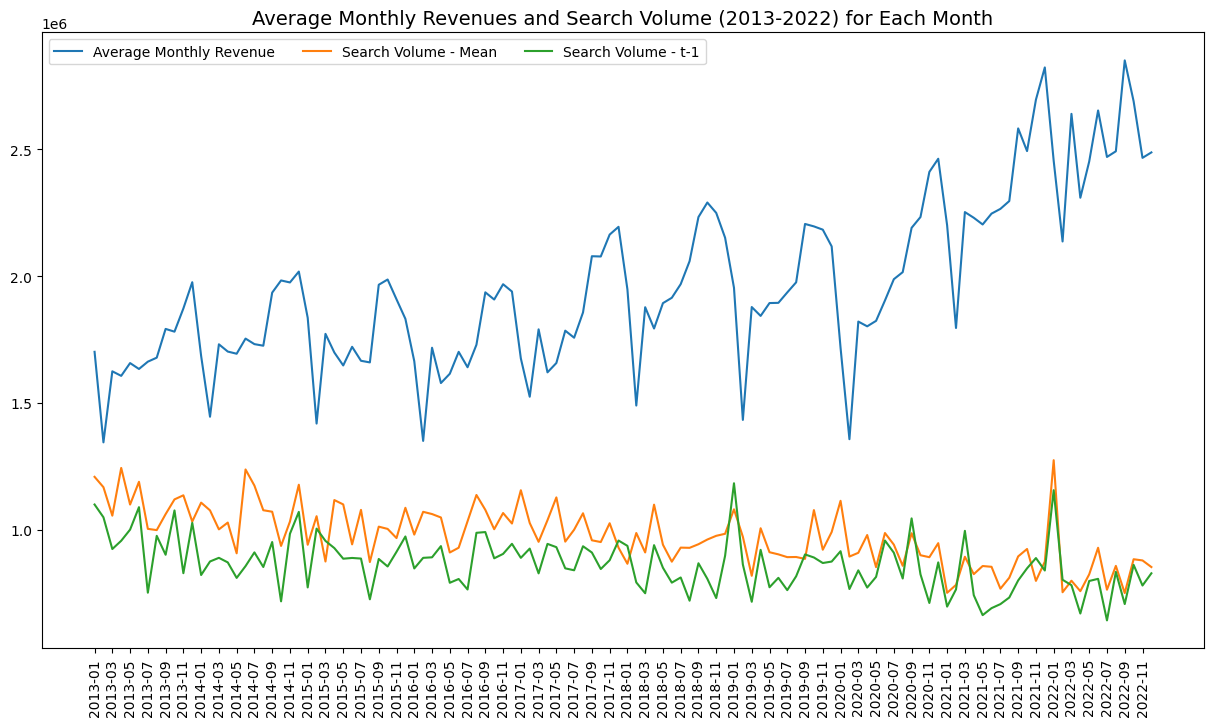

In [46]:
plotMeanByMonth(org_data, scaled_search_volume_mean*600000, scaled_search_volume_t1*600000, '2013-2022', 15)

In [47]:
org_data.mean(axis=0).mean()

1958683.7288306453

In [49]:
search_volume_mean_scale = scaled_search_volume_mean*1200000
search_volume_mean_scale.mean(axis=0).mean()

1953183.1095222582

In [51]:
search_volume_mean_scale = scaled_search_volume_mean*1250000
search_volume_mean_scale.mean(axis=0).mean()

2034565.7390856857

### **5.4 Average Scaled Search Volume for Each Category of Companies**


#### **5.4.1 Categorize Search Volume by Average Monthly Revenues**


In [52]:
categorized_scaled_sv_mean = categorizeSearchVolume(scaled_search_volume_mean)
categorized_scaled_sv_t1 = categorizeSearchVolume(scaled_search_volume_t1)

#### **5.4.2 Plot**


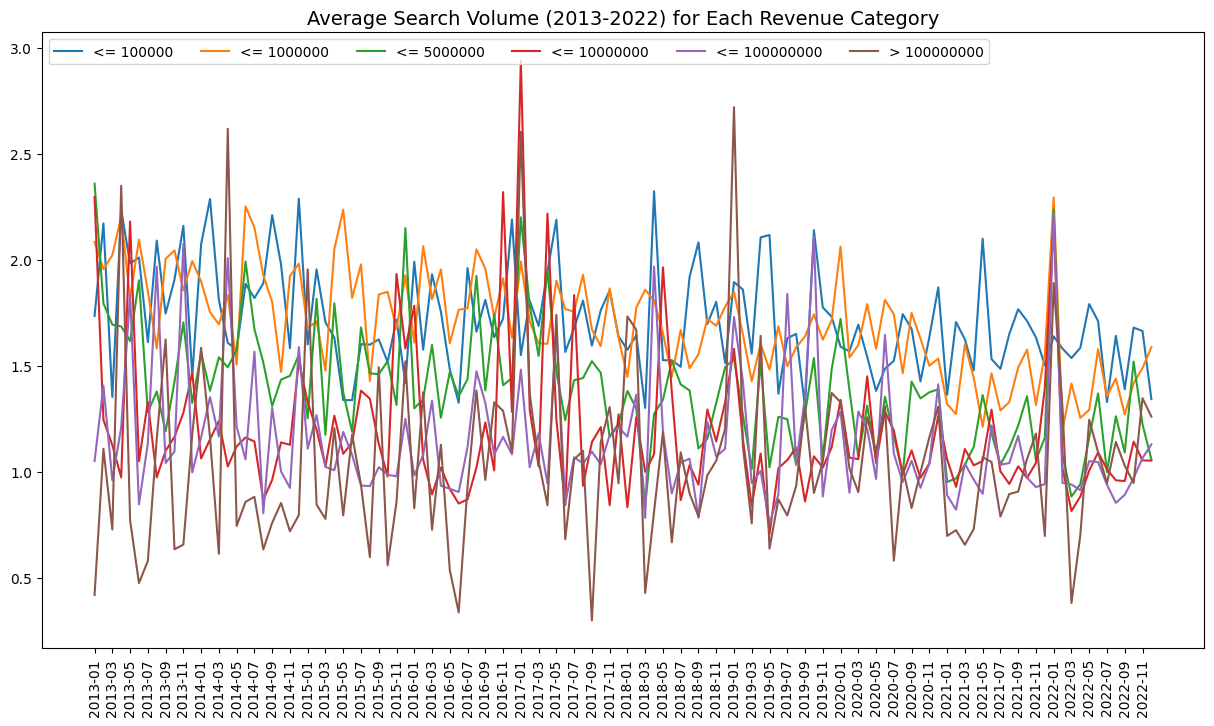

In [53]:
plotMeanByCategory(categorized_scaled_sv_mean, '2013-2022', 15)

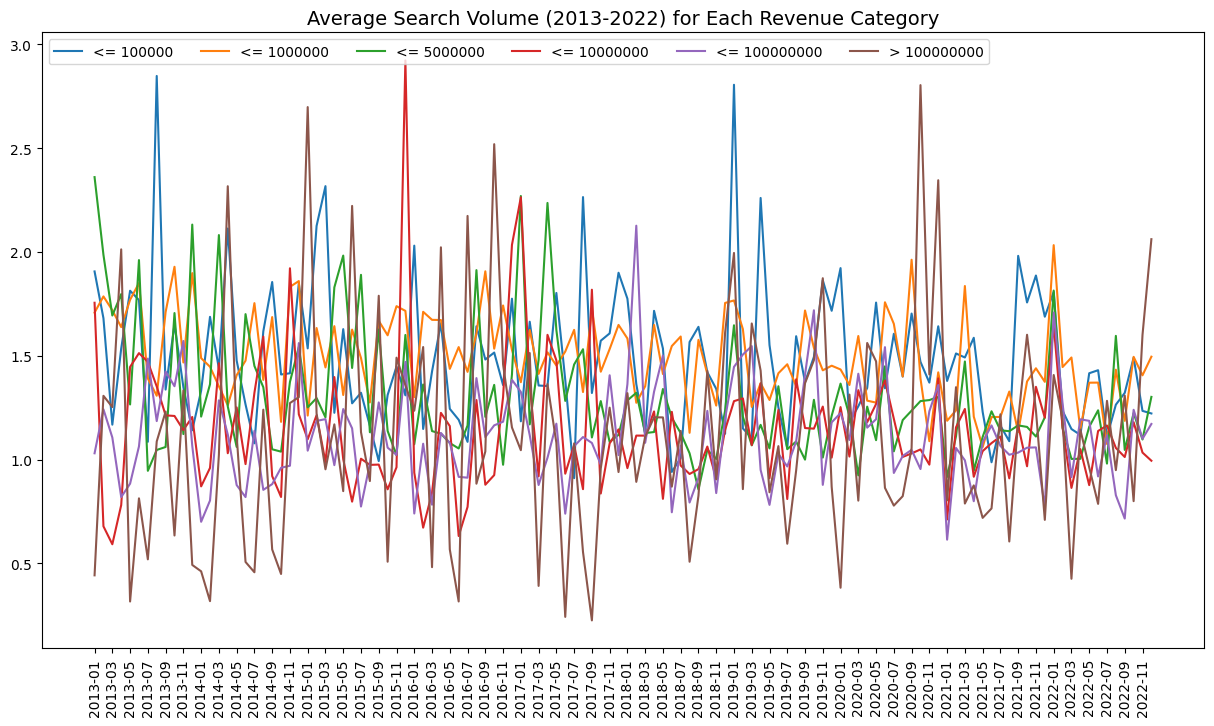

In [54]:
plotMeanByCategory(categorized_scaled_sv_t1, '2013-2022', 15)

### **5.5 Output**

In [55]:
output_path = os.path.join(project_path, '資料集/search volume')

In [56]:
scaled_search_volume_mean.to_csv(os.path.join(output_path, 'search_volume_mean_scaled.csv'))

In [57]:
scaled_search_volume_t1.to_csv(os.path.join(output_path, 'search_volume_t-1_scaled.csv'))

## **6. Calculate Search Volume Score (Exclude Zero)**
2023.06.19

### **6.0 Setup**

In [58]:
import time

In [59]:
trends_save_path = os.path.join(project_path, '資料集/google trends')

### **6.1 Class & Methods**

In [60]:
class NewMonthlySearchVolume():

    def __init__(self, company_list: list, year_start: int, year_end: int):
        self.company_list = company_list
        self.year_start = year_start
        self.year_end = year_end


    #-------------------- Individual Company --------------------

    def readCompanyTrends(self, index):
        file_name = self.company_list[index]
        trendsD = pd.read_csv(os.path.join(trends_save_path, f'monthly/{file_name}.csv'), index_col = 0).loc[['t-4', 't-3', 't-2', 't-1']]
        trendsD.columns = org_data.columns

        return trendsD


    def companySearchVolume(self, index, trendsD: pd.DataFrame = pd.DataFrame()):
        if trendsD.empty:
            trendsD = self.readCompanyTrends(index)

        if trendsD.isnull().all().all():    # company without trends data
            search_volume_1 = pd.DataFrame(0, columns = org_data.columns, index = [company_list[index]])
            search_volume_2 = pd.DataFrame(0, columns = org_data.columns, index = [company_list[index]])
        else:
            trendsD.loc['Mean'] = pd.Series(trendsD.apply(lambda col: col[col != 0].mean()).fillna(0))
            search_volume_1 = trendsD.loc[['Mean']]
            search_volume_1.index = [company_list[index]]

        return search_volume_1


   #-------------------- All the Companies --------------------

    def allCompanySearchVolume(self):
        start = time.time()

        all_search_volume_1 = pd.DataFrame(columns = org_data.columns)
        all_search_volume_2 = pd.DataFrame(columns = org_data.columns)

        for i in range(0, len(self.company_list), 1):
            search_volume_1 = self.companySearchVolume(i)
            all_search_volume_1 = pd.concat([all_search_volume_1, search_volume_1])

        runtime = "%.3f"%(time.time() - start)
        print(f"Time spent: {runtime} sec.")

        return all_search_volume_1


### **6.2 Individual Company (e.g. 2330 台積電 & 1110 東泥)**

In [61]:
nmt = NewMonthlySearchVolume(company_list, 2013, 2022)

In [62]:
# 台積電
sv1 = nmt.companySearchVolume(256)
display(sv1)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
2330 台積電,69.0,70.25,35.5,88.0,44.5,35.75,68.0,47.0,55.0,60.75,...,47.75,46.75,62.75,88.5,56.25,67.0,45.25,34.5,88.0,45.5


In [63]:
# 東泥
sv1 = nmt.companySearchVolume(6)
display(sv1)

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1110 東泥,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **6.3 All the Companies (1 min.)**

In [64]:
nmt = NewMonthlySearchVolume(company_list, 2013, 2022)
all_search_volume_1 = nmt.allCompanySearchVolume()

Time spent: 65.464 sec.


In [65]:
all_search_volume_1

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,56.0,56.666667,0.0,100.0,51.00,26.00,100.000000,0.00,32.00,42.00,...,40.000000,36.000000,62.000000,41.75,41.250000,46.250000,51.00,36.75,70.750000,54.750000
1102 亞泥,69.0,0.000000,55.0,83.0,82.00,55.50,55.000000,45.00,55.00,18.00,...,48.666667,40.666667,56.250000,38.00,65.000000,50.000000,58.25,52.50,42.333333,65.250000
1103 嘉泥,0.0,58.000000,42.0,63.5,0.00,60.00,32.000000,100.00,92.00,99.00,...,42.000000,39.000000,31.500000,62.00,28.000000,77.500000,29.00,42.50,0.000000,29.000000
1104 環泥,100.0,0.000000,80.0,0.0,0.00,72.50,0.000000,0.00,100.00,100.00,...,27.000000,67.000000,54.000000,0.00,0.000000,0.000000,83.00,23.00,64.000000,37.000000
1108 幸福,64.5,59.000000,76.5,75.0,65.75,66.25,77.500000,90.25,74.75,74.25,...,76.750000,84.500000,78.250000,70.00,76.000000,86.000000,81.25,84.75,82.500000,69.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,56.000000,50.0,33.0,18.00,0.00,52.000000,38.00,63.00,33.00,...,38.000000,69.500000,67.500000,0.00,46.000000,81.000000,0.00,0.00,0.000000,0.000000
9955 佳龍,51.0,29.000000,100.0,27.0,59.50,95.00,70.666667,0.00,0.00,76.00,...,58.666667,60.500000,36.500000,39.00,30.250000,48.666667,47.00,54.00,90.000000,51.000000
9958 世紀鋼,100.0,0.000000,48.5,25.0,72.50,0.00,0.000000,0.00,37.00,0.00,...,59.666667,64.000000,60.500000,24.50,21.000000,39.000000,56.50,56.00,53.250000,44.000000
9960 邁達康,100.0,0.000000,70.0,0.0,69.50,0.00,34.000000,0.00,0.00,100.00,...,59.666667,38.500000,56.000000,28.50,61.333333,18.000000,49.00,47.00,61.333333,62.666667


### **6.4 Average Search Volume for Each Month**

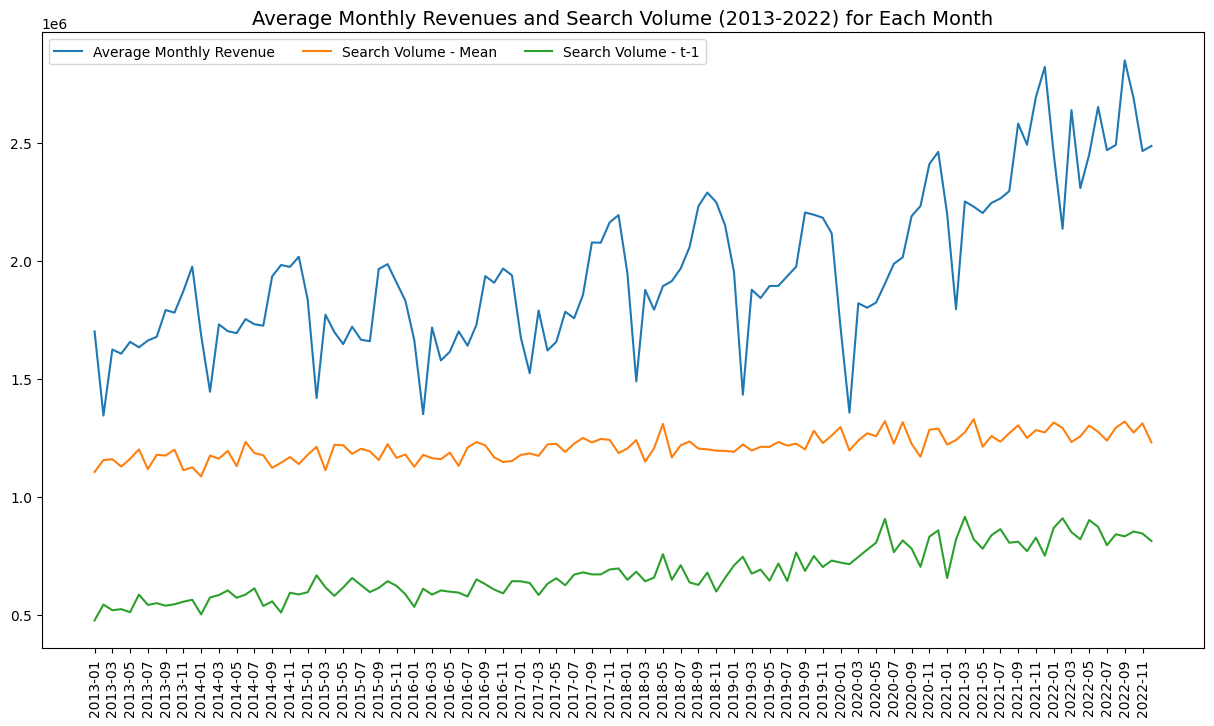

In [66]:
plotMeanByMonth(org_data, all_search_volume_1*30000, search_volume_t1*30000, '2013-2022', 15)

In [67]:
org_data.mean(axis=0).mean()

1958683.7288306453

In [68]:
search_volume_mean_scale = search_volume_mean*80000
search_volume_mean_scale.mean(axis=0).mean()

1758755.241935484

In [69]:
search_volume_mean_scale = search_volume_mean*90000
search_volume_mean_scale.mean(axis=0).mean()

1978599.6471774194

### **6.5 Average Search Volume for Each Category of Companies**

#### **6.5.1 Categorize Search Volume by Average Monthly Revenues**


In [70]:
categorized_sv_mean_new = categorizeSearchVolume(all_search_volume_1)

#### **6.5.2 Plot**


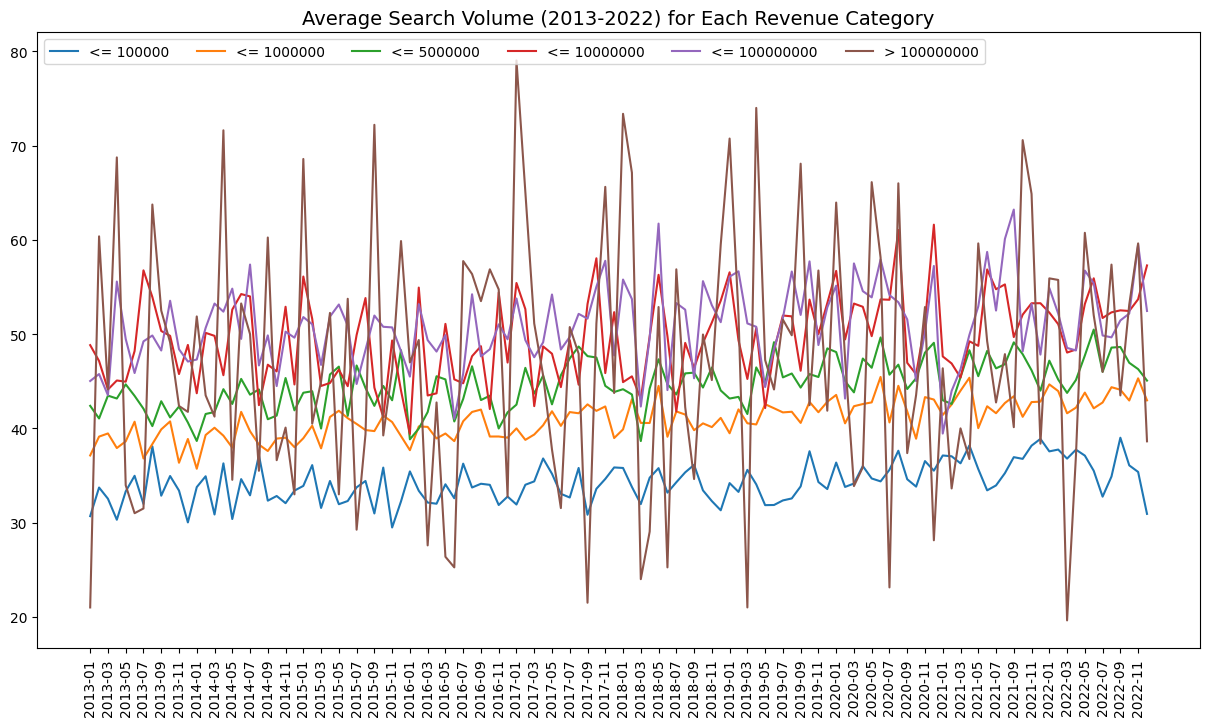

In [71]:
plotMeanByCategory(categorized_sv_mean_new, '2013-2022', 15)

營收愈高的公司，搜尋分數也會愈高

### **6.6 Output**

In [72]:
output_path = os.path.join(project_path, '資料集/search volume')

In [73]:
all_search_volume_1.to_csv(os.path.join(output_path, 'search_volume_mean_new.csv'))